<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/jacwah/Lab_4/jacwah_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Jacob Wahlgren**

# **Abstract**

#**About the code**

The code was written by Jacob Wahlgren, based on a template by Johan Hoffman.

In [78]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)
# Copyright (C) 2021 Jacob Wahlgren (jacobwah@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# **Introduction**

# **Method**

First some general definitions. I use a tolerance of $10^{-7}$. The `Poly` class represents a polynomial

$\displaystyle P(x) = \sum_{i=0}^{n-1} a_i x_i^i.$

In [35]:
TOL = 1e-2

class Poly:
    def __init__(self, coef):
        self.coef = coef
        self.n = len(coef)
    
    def __call__(self, x):
        return sum(self.coef[i]*x[i]**i for i in range(self.n))
    
    def grad(self, x):
        return sum(self.coef[i]*i*x[i]**(i-1) for i in range(self.n))
    
class SOS:
    def __init__(self, x0):
        self.x0 = x0
        self.n = len(x0)
    
    def __call__(self, x):
        return sum((x[i]-self.x0[i])**2 for i in range(self.n))
    
    def grad(self, x):
        return sum(2*(x[i]-self.x0[i]) for i in range(self.n))

### Gradient descent in $R^n$

As input we receive a function $f(x): R^n \rightarrow R$. Using the gradient the algorithm locates a stationary point $x^*$, i.e. where $\|\nabla f(x^*)\| < \text{TOL}$.

In [40]:
def gradient_descent_steps(f):
    x = np.zeros(f.n)
    steps = [x]
    while True:
        Df = f.grad(x)
        if np.linalg.norm(Df) <= TOL:
            break
        alpha = get_step_length(f, Df, x)
        x -= alpha * Df
        steps.append(x)
    return np.array(steps)

def gradient_descent(f):
    return gradient_descent_steps(f)[-1]

def get_step_length(f, Df, x):
    return np.linalg.norm(Df)*0.1

# **Results**

### Gradient descent in $R^n$

In [41]:
x0 = np.random.rand(2)
f = SOS(x0)
xs = gradient_descent_steps(f)
print(xs)

[[0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]
 [0.37239572 0.37239572]


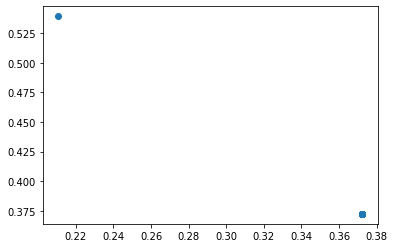

In [42]:
plt.plot(xs[:,0], xs[:,1], '-o')
plt.scatter(x0[0], x0[1])

# **Discussion**